# Linear Regression

## House pricing example

In [2]:
import pandas as pd
import numpy as np

In [3]:
house_price = [50000,200000,140000,320000,220000,380000] # observations of the target variable 
house_size = [500, 1500, 2500, 3500, 4500, 5500] # predictor or feature 
kitchen_size = [40, 100, 200, 220, 250, 300] # predictor or feature 

In [4]:
house_data = pd.DataFrame({'house_price':house_price, 'house_size': house_size, 'kitchen_size': kitchen_size})
house_data.head()

,house_price,house_size,kitchen_size
0,50000,500,40
1,200000,1500,100
2,140000,2500,200
3,320000,3500,220
4,220000,4500,250


We will use train_test_split function from sklearn (scikit learn) package. This function will return a list of arrays.

1. Features train (X_train)
2. Features test  (X_test)
3. Response train (Y_train)
4. Response test  (Y_test)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
features = ['house_size', 'kitchen_size'] # features names
X = house_data[features] 
Y = house_data['house_price']

In [ ]:
X.head()

In [8]:
Y.head()

0     50000
1    200000
2    140000
3    320000
4    220000
Name: house_price, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
help(train_test_split)

In [15]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [16]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.9379131934463928


In [17]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -33333.333333333605
The coef (b_1) is  -311.4285714285717
The coef (b_2) is  6619.047619047625


In [18]:
house_price_pred = my_linear_regression.predict(X_test)
house_price_pred 

array([239523.80952381, 511904.76190476])

Now let's evaluate the model performance over the test data

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, house_price_pred)))

Mean Absolute Error: 256190.4761904763
Mean Squared Error: 79023356009.07037
Root Mean Squared Error: 281110.93185621646


In [20]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [21]:
print('MAPE:', MAPE(Y_test, house_price_pred)*100, "%")

MAPE: 151.30683852488374 %


## Example 2: Boston House Prices

http://lib.stat.cmu.edu/datasets/boston

In [48]:
import pandas as pd
df = pd.read_csv('/content/boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


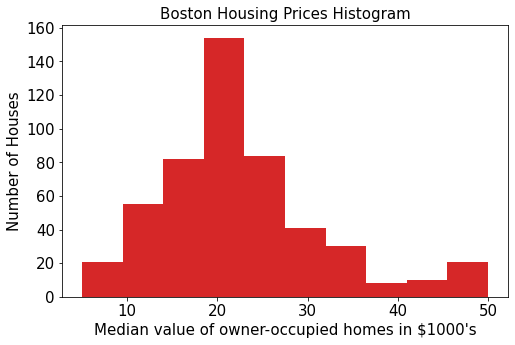

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df['MEDV'], color = 'Tab:red')
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of owner-occupied homes in $1000\'s', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

#### Features Scatterplot

Crime rate vs House prices

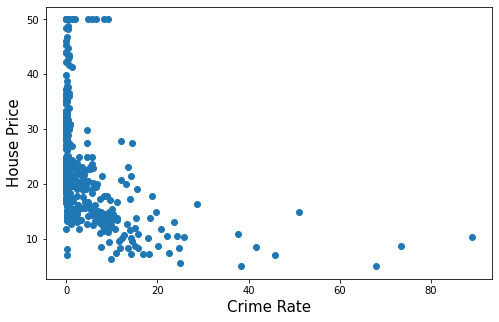

In [51]:
plt.figure(figsize = (8, 5))
plt.scatter(x = df['CRIM'], y = df['MEDV'], color = 'Tab:blue')
plt.xlabel('Crime Rate', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

## Multiple Linear Regression Model

### Step 1: Create a Dataframe

In [52]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 2: Indetify Feature and Response Variable

In [89]:
features_names = df.columns.to_list()[:-1]
X = df[features_names] # features
Y = df['MEDV'] # response or target variable

### Step 3: Prepare test and train data

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Step 4: Fit Model to Train Data

In [91]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

### Step 5: Test and Evaluate the Model

In [92]:
pred = my_linear_regression.predict(X_test)
pred

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

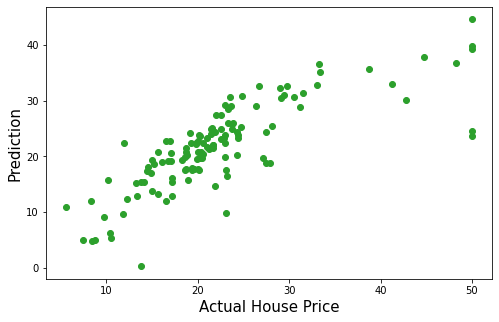

In [93]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [94]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.7697699488741149


In [95]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features_names)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  36.93325545711923
The coef (b_1) is  -0.11773528930860672
The coef (b_2) is  0.04401749689521767
The coef (b_3) is  -0.005768143138903178
The coef (b_4) is  2.3934159404901565
The coef (b_5) is  -15.58942112939661
The coef (b_6) is  3.7689676985862004
The coef (b_7) is  -0.007035178278218154
The coef (b_8) is  -1.4349564133200243
The coef (b_9) is  0.24008108562512526
The coef (b_10) is  -0.011297280957547319
The coef (b_11) is  -0.9855467321312561
The coef (b_12) is  0.008444434527730473
The coef (b_13) is  -0.49911679732611447


In [96]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 3.668330148135719
Mean Squared Error: 29.782245092302375
Root Mean Squared Error: 5.457311159564055
MAPE: 17.54993780061571 %


## Data Normalization

1. Standardization: Features will be rescled so that they will have the properties of a standard normal distribution, $\mu = 0$ and $\sigma = 1$.

2. Normalization: The data is scaled to a fixed range-usually 0 to 1.

### Normalization

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [98]:
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


### Histograms

#### Normalized data

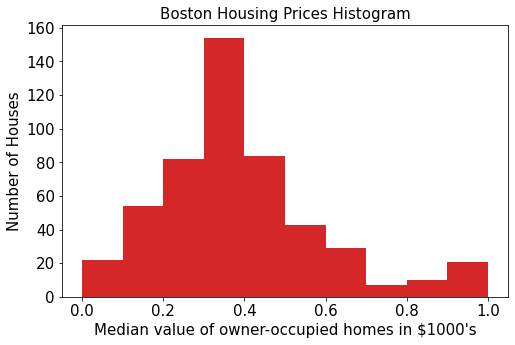

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df_norm.MEDV, color = 'Tab:red')
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of owner-occupied homes in $1000\'s', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

## Linear Regression Feature Importance

We can fit a linear regression model on the regression dataset and retrieve the coef_ property that contains the coefficients for each feature.

These coefficients can provide the basis for crude feature importance score.

**Step 1:** Normalization

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

**Step 2:** Fit model

In [101]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names] # features
Y = df_norm['MEDV'] # response or target variable
my_linear_regression.fit(X, Y)

LinearRegression()

**Step 3:** Extract feature importance and summarize

In [102]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,CRIM,-0.213550
1,ZN,0.103157
2,INDUS,0.012463
3,CHAS,0.059705
4,NOX,-0.191879
5,RM,0.441860
6,AGE,0.001494
7,DIS,-0.360592
8,RAD,0.156425
9,TAX,-0.143629


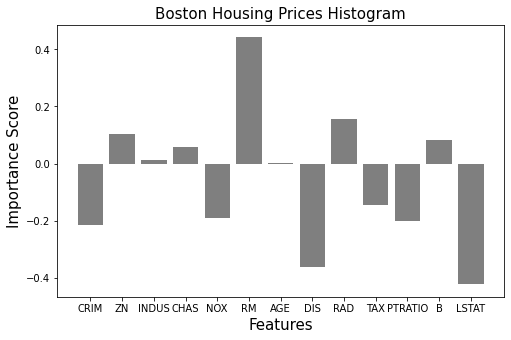

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:gray') 
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()